In [1]:
#!pip install librosa
#!pip install resampy
#!pip install seaborn

In [3]:
# Utility
import os
import glob
import numpy as np
import math
#from tqdm import tqdm
import itertools
import pandas as pd 
import fnmatch
import resampy 

#handling audio
from scipy.io import wavfile
import librosa, librosa.display
import IPython.display as ipd
import librosa
import librosa.display

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
#from sklearn.utils import class_weight
from scipy.signal import butter, lfilter

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

 EDA

In [6]:
metadataA= pd.read_csv("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a.csv")

In [8]:
metadataA.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [10]:
metadataA.label.value_counts()

label
artifact    40
murmur      34
normal      31
extrahls    19
Name: count, dtype: int64

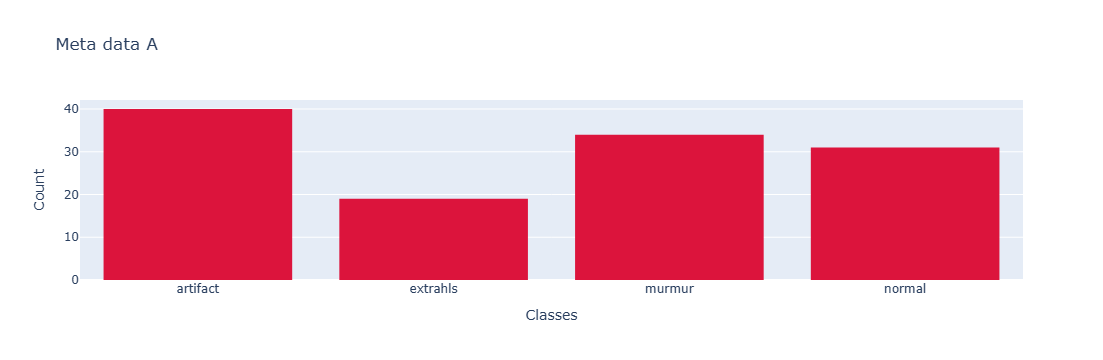

In [12]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataA["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data A",
    xaxis_title="Classes",
    yaxis_title="Count",
    #legend_title="CSV",
    #showlegend=True,
)

fig.show()

In [13]:
metadataA.isnull().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

We have 52 unlabelled target columns

In [17]:
metadataA.drop("sublabel" ,axis=1, inplace = True)

In [19]:
metadataA.shape

(176, 3)

In [25]:
metadataB = pd.read_csv("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b.csv")

In [27]:
metadataB.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [29]:
metadataB.label.value_counts()

label
normal        320
murmur         95
extrastole     46
Name: count, dtype: int64

In [31]:
metadataB.isnull().sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* We have 195 unlabelled target columns

In [34]:
metadataB.drop("sublabel", axis =1, inplace=True)

In [36]:
metadataB.shape

(656, 3)

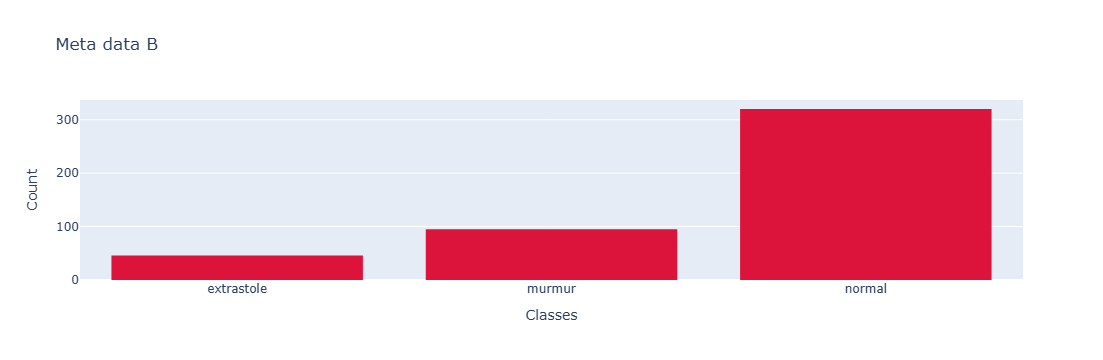

In [38]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataB["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data B",
    xaxis_title="Classes",
    yaxis_title="Count",
)

fig.show()

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'>💡 Getting Sample greater than 4:</font></h3>

    

* This is to make a csv containing A and B both combined.
​
  
* It will include all the labels in both values.
​
    
* Done using a Logic of os and glob function.
    

In [45]:
#dataset import and append
dataset = []
for folder in ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/**","C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/**"]:
    for filename in glob.iglob(folder):         #Compares file pattern in folder to what is being fed
        if os.path.exists(filename):         
            label = os.path.basename(filename).split("_")[0]       #takes the label out, if you notice, you will realie
# skip audio smaller than 4 secs
       # if librosa.get_duration(filename=filename)>=4:
        if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
            dataset.append({
                            "filename": filename,
                            "label": label
                          })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

In [48]:
df2 = pd.concat([metadataA.dropna(),metadataB.dropna()])

In [50]:
df2.shape

(585, 3)

In [52]:
df.shape 

(585, 2)

In [54]:
print(df.columns)  # This will print all column names
print(df.head())   # This will print the first few rows of the DataFrame


Index(['filename', 'label'], dtype='object')
                                              filename   label
383  C:/Users/krake/Downloads/heart _sounds_abnorma...  normal
422  C:/Users/krake/Downloads/heart _sounds_abnorma...  normal
90   C:/Users/krake/Downloads/heart _sounds_abnorma...  murmur
472  C:/Users/krake/Downloads/heart _sounds_abnorma...  normal
523  C:/Users/krake/Downloads/heart _sounds_abnorma...  normal


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* One is from audio file names (both set A and B) and one is from metadata about set A and B combined.

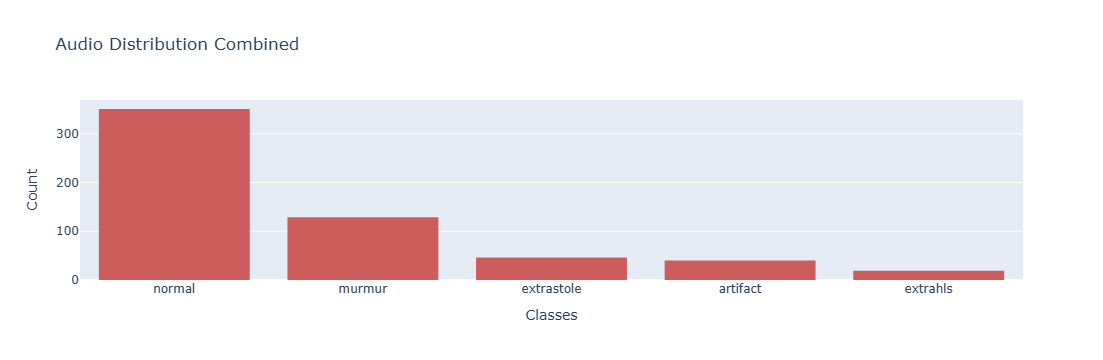

In [57]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count" 
)

fig.show()


In [59]:
df.shape

(585, 2)

In [71]:
dataset = []
for folder in ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/**","C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
# skip audio smaller than 4 secs
        if librosa.get_duration(filename=filename)>=4:
            if label not in ["Aunlabelledtest", "Bunlabelledtest"]:       #we remove the NaN values
                dataset.append({
                                "filename": filename,
                                "label": label
                              })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

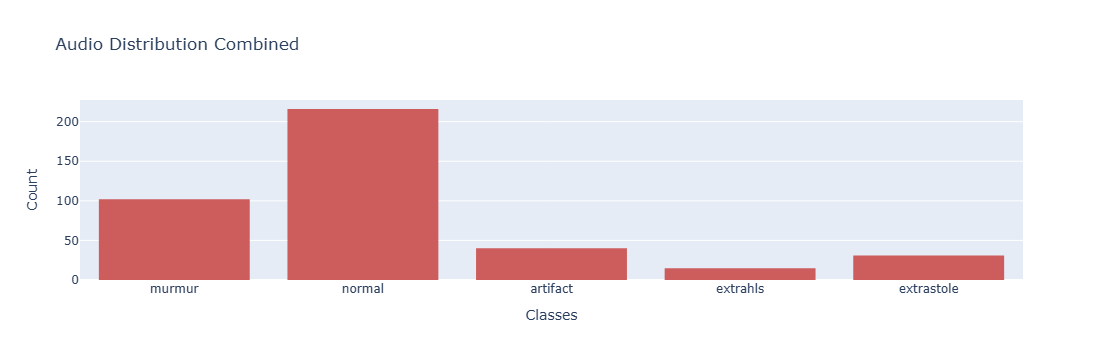

In [72]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count"    
)

fig.data[0].hovertext = "Count: " + df["label"].value_counts().to_string()

fig.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

- Notice the size of the data has been reduced.

In [74]:
df.shape

(404, 2)

 Understanding Audio Data

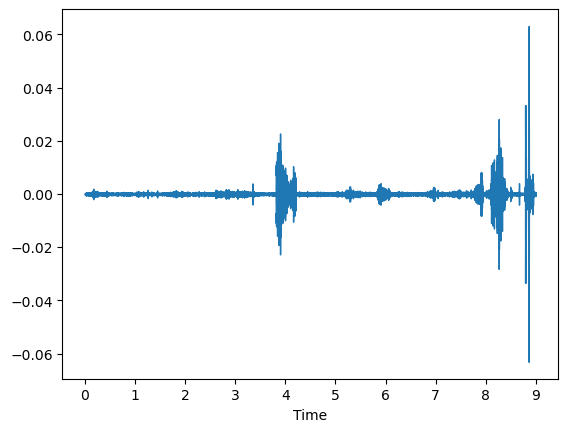

In [81]:
data,frame=librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/Aunlabelledtest__201012172010.wav')
librosa.display.waveshow(data,sr=
                         frame)
ipd.Audio('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/Aunlabelledtest__201012172010.wav')

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'>💡 Sampling Rate:</font></h3>

* **The rate at which the audio data is split into samples based on the time period.**
    
* In real time, the signals are taken continuously (known as analog), but the analysis and processing are done indiscrete (known as digital).
    
* So the conversion of signal from continuous to discrete is
  called as sampling.

* There is a rate at which the sampling is done, if it is too 
  less then there will be data loss because the sampled
  signal might not contain all the information of the original
  signal.
    
* If the rate is too high, it will take a lot of resource and time for processing. The ideal sampling rate is twice the frequency of t maximum component in the signal (Nyquist thorem).


In [84]:
frame

22050

# How we feature extract?

- MFCCs (Mel-Frequency Cepstral Coefficients)

Its important to keep in mind that more we put the n_mfcc's more the amount of features we will get. we should aim to get a good amount but also not overbombard our model with too many features as it **increase the extract as well as train time to handle that many features.**


- MFCCs capture spectral characteristics of an audio signal and are particularly useful for audio classification tasks. They represent the **short-term power spectrum of sound.**

In [87]:
ad, sr_demo = librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/Aunlabelledtest__201012172010.wav')

In [89]:
ad

array([-1.3300075e-04, -3.8742459e-05,  1.9526233e-04, ...,
        9.4768242e-05, -3.0561769e-05,  6.3747757e-05], dtype=float32)

In [91]:
mfcc_features = librosa.feature.mfcc(y=ad, sr=sr_demo, n_mfcc=120)

In [92]:
mfcc_features

array([[-7.0692432e+02, -6.6794958e+02, -6.7087701e+02, ...,
        -5.0019699e+02, -5.7692236e+02, -6.3796930e+02],
       [ 2.8123173e+01,  2.8553217e+01,  2.5149151e+01, ...,
         1.2171394e+02,  9.5718910e+01,  6.3969620e+01],
       [-1.6440914e+01, -1.2745928e+01, -1.6828171e+01, ...,
        -1.6945375e+01, -1.1586290e+01, -3.6535420e+00],
       ...,
       [-6.5479136e-01,  2.0411217e-01, -4.2050481e-02, ...,
         1.0647817e+00,  1.5021825e+00,  2.7375002e+00],
       [ 6.0962105e-01, -4.1888475e-01, -7.4712992e-01, ...,
         3.7794781e-01, -4.3133998e-01, -5.6582975e-01],
       [ 8.2867336e-01, -6.7282033e-01,  3.2535553e-01, ...,
        -5.7031274e-01, -1.4734523e+00, -3.7162209e+00]], dtype=float32)

<h2> Streching for Data Augmentation </h2>

When **Shrink** and **Strech** our audio by multiplying it by a factor of 0.8 and 1.2 respectively so that our model is more robust as it is expoused to some disturbance of the same features.

In [94]:

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs                                 
    normal_cutoff = cutoff / nyquist 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a                                                        #This function returns filtering coefficents

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y                   #This gives us filtered data

def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  #features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)        #checks if its in given label name
            label = name.split("*")[0]                              #takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)                  #importing audio from path
 
                if duration > min_duration:                                           #Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)
                    
                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)         # Apply the low-pass filter
                    
                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)  # Extract MFCC features 
                    
                    
                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))              # other audio features
                    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=x_filtered, sr=sr))         
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))
                    
                    feature_list.append([*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

                    # STRECHING FOR AGUMENTATION
                    
                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)
                    
                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)
                    
                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))         # Calculate other audio features for the time-stretched version
                    spectral_centroid_stretch_1 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_1, sr=sr))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_centroid_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])
                    
                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)  # Apply time-stretching with a factor of 1.2 to the filtered audio
                    
                   
                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)   # Extract MFCC features from the time-stretched audio
                    
        
                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_centroid_stretch_2 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_2, sr=sr))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_centroid_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)


In [95]:
def audio_to_df_DPL_withoutstrech(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  # features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)  # checks if it's in the given label name
            label = name.split("*")[0]  # takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)  # importing audio from path

                if duration > min_duration:  # Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)

                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)  # Apply the low-pass filter

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=120), axis=1)  # Extract MFCC features

                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))  # other audio features
                    spectral_centroid = np.mean(
                        librosa.feature.spectral_centroid(y=x_filtered, sr=sr))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append(
                        [*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

    return pd.DataFrame(feature_list, columns=columns)



In [96]:
audio_folders = ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/", "C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)]

for name in ["zero", "centroid", "rolloff", "chroma", "label", "file"]:
    columns.append(name)

type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav" , "extrahls*.wav"]

In [98]:
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* Audio Data is converted to Numerical Values!

In [100]:
audio_df.head()

mfcc0      mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -788.588306  65.291386  62.333752  57.614739  51.430259  44.157487   
1 -816.227316  67.266281  63.933927  59.118363  52.900217  45.565411   
2 -837.613968  74.638407  70.054396  64.534533  57.321888  48.910114   
3 -536.386440  53.564943  51.666318  49.582095  46.871201  43.633805   
4 -573.398040  53.312309  51.281134  49.177413  46.513017  43.277555   

       mfcc6      mfcc7      mfcc8      mfcc9  ...   mfcc124   mfcc125  \
0  36.222588  28.065465  20.105108  12.708932  ... -0.033013 -0.030440   
1  37.593241  29.365698  21.296740  13.761163  ...  0.002560 -0.001769   
2  39.840270  30.588133  21.670929  13.493464  ... -0.042435 -0.040191   
3  39.893947  35.817816  31.545484  27.202732  ... -0.076462 -0.069278   
4  39.628012  35.593751  31.351993  27.042949  ... -0.132925 -0.133457   

    mfcc126   mfcc127      zero    centroid     rolloff    chroma   label  \
0 -0.023207 -0.012522  0.013782  141.823191  196.661624  0.508633  normal   
1 -0.003259 -0.002355  0.013242  141.765773  192.004395  0.442402  normal   
2 -0.031353 -0.017051  0.013292  146.266506  199.929810  0.447429  normal   
3 -0.052305 -0.028029  0.004036   57.004935   90.613710  0.744513  normal   
4 -0.097932 -0.054065  0.003954   59.763242   95.802816  0.711691  normal   

                                   file  
0              normal__201101070538.wav  
1  normal__201101070538.wav_stretch_0.8  
2  normal__201101070538.wav_stretch_1.2  
3              normal__201101151127.wav  
4  normal__201101151127.wav_stretch_0.8  

[5 rows x 134 columns]

In [101]:
audio_df.shape

(1212, 134)

In [102]:
audio_df_cp = audio_df.copy()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* Our dataframe is sorted, we need to shuffle it.

In [104]:
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)       #no index and shuffle

In [106]:
audio_df.head()

mfcc0       mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
0 -500.715520   92.620850  86.071653  77.634822  67.263540  55.689638   
1 -612.745655   73.095092  69.279078  64.017356  57.258868  49.457083   
2 -614.683466  103.952297  93.899877  80.440220  64.619771  48.375569   
3 -514.446678   69.210547  66.557048  62.327196  56.782803  50.246250   
4 -503.885130   46.592810  45.526466  43.863287  41.688643  39.051310   

       mfcc6      mfcc7      mfcc8      mfcc9  ...   mfcc124   mfcc125  \
0  43.780677  32.543852  22.597963  14.278053  ...  0.000574  0.000862   
1  41.047557  32.571364  24.491733  17.179264  ... -0.156416 -0.133258   
2  33.460329  21.181627  11.997901   5.810884  ...  0.084443  0.052124   
3  43.073132  35.628914  28.267827  21.311523  ...  0.004313 -0.000330   
4  35.997047  32.604444  28.980390  25.232116  ...  0.194620  0.147915   

    mfcc126   mfcc127      zero    centroid     rolloff    chroma       label  \
0 -0.005134  0.003603  0.008525  108.836140  180.938721  0.563901      murmur   
1 -0.097188 -0.051205  0.006795   91.418303  161.150106  0.616644      normal   
2  0.039442  0.031790  0.008941  112.198993  190.010579  0.568288      normal   
3 -0.003617 -0.003301  0.006104   81.328086  136.825562  0.653500  extrastole   
4  0.099482  0.049998  0.004295   70.053499  117.485555  0.688458      murmur   

                                                file  
0        murmur__156_1306936373241_B.wav_stretch_0.8  
1  normal_noisynormal_157_1306937583792_B.wav_str...  
2  normal_noisynormal_188_1308074301731_A.wav_str...  
3    extrastole__213_1308245263936_D.wav_stretch_1.2  
4               murmur__201108222251.wav_stretch_0.8  

[5 rows x 134 columns]

In [107]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [108]:
summary(audio_df).style.background_gradient(cmap='YlOrBr')

data shape: (1212, 134)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* There are no null values, all columns are numerical in nature except label.

In [110]:
audio_df.label.value_counts()

label
normal        648
murmur        306
artifact      120
extrastole     93
extrahls       45
Name: count, dtype: int64

<h3>Encoding

In [112]:
encoder = LabelEncoder()

coded_label = encoder.fit_transform(audio_df["label"])

In [113]:
audio_df["label"] = coded_label

In [114]:
audio_df.head()

mfcc0  mfcc1  mfcc2  mfcc3  mfcc4  mfcc5  mfcc6  mfcc7  mfcc8  mfcc9  ...  \
0 -500.72  92.62  86.07  77.63  67.26  55.69  43.78  32.54  22.60  14.28  ...   
1 -612.75  73.10  69.28  64.02  57.26  49.46  41.05  32.57  24.49  17.18  ...   
2 -614.68 103.95  93.90  80.44  64.62  48.38  33.46  21.18  12.00   5.81  ...   
3 -514.45  69.21  66.56  62.33  56.78  50.25  43.07  35.63  28.27  21.31  ...   
4 -503.89  46.59  45.53  43.86  41.69  39.05  36.00  32.60  28.98  25.23  ...   

   mfcc124  mfcc125  mfcc126  mfcc127  zero  centroid  rolloff  chroma  label  \
0     0.00     0.00    -0.01     0.00  0.01    108.84   180.94    0.56      3   
1    -0.16    -0.13    -0.10    -0.05  0.01     91.42   161.15    0.62      4   
2     0.08     0.05     0.04     0.03  0.01    112.20   190.01    0.57      4   
3     0.00    -0.00    -0.00    -0.00  0.01     81.33   136.83    0.65      2   
4     0.19     0.15     0.10     0.05  0.00     70.05   117.49    0.69      3   

                                                file  
0        murmur__156_1306936373241_B.wav_stretch_0.8  
1  normal_noisynormal_157_1306937583792_B.wav_str...  
2  normal_noisynormal_188_1308074301731_A.wav_str...  
3    extrastole__213_1308245263936_D.wav_stretch_1.2  
4               murmur__201108222251.wav_stretch_0.8  

[5 rows x 134 columns]

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* We can will not be analyzing MFCC because on its own they won't provide relevant information anyhow.

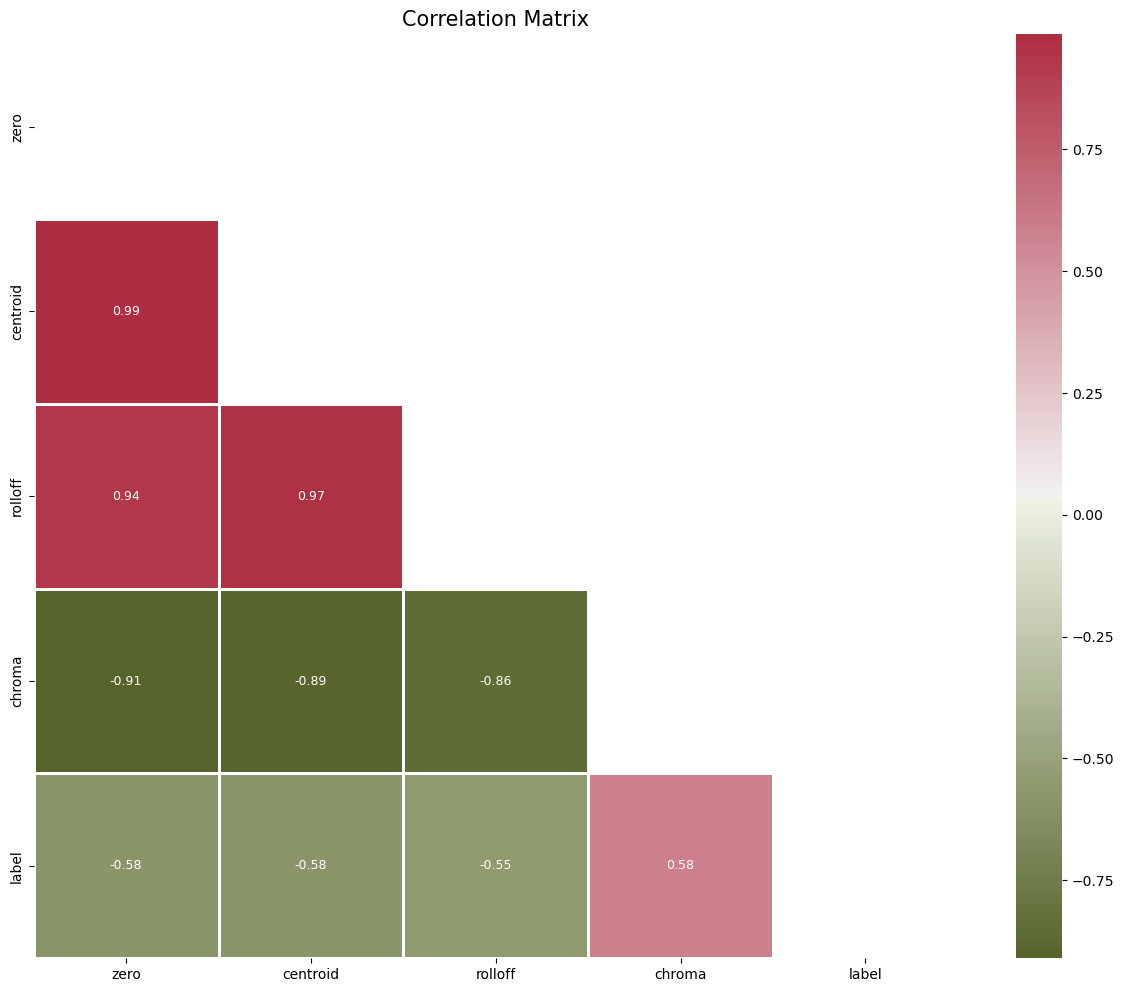

In [116]:
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
mask = np.triu(np.ones_like(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), dtype=bool))        #makes one mask
plt.figure(figsize=(15, 12))

sns.heatmap(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), annot=True, cmap=cmap, fmt='.2f', mask = mask, linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Correlation Matrix', fontsize=15)
plt.show()

<div style="border-radius:10px; border:#87acde solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87acde'>💡 Observations Post-Visualization:</font></h3>

* While tree-based models like Decision Trees, Random Forests, and Gradient Boosting Machines are generally robust to multicollinearity, it's still worth noting when certain features are highly correlated. In our heatmap, we observed that Roll off highly correlated with Centroid and zero higly related to centroi having similarity of almost 0.99 and 0.97 respectively, indicating they are essentially the same feature.

* Though correlation is less critical for tree-based models compared to linear models, we should still consider it during the feature selection process. Having features that are highly correlated can make our model unnecessarily complex. When two features have a high correlation, we can consider dropping one to simplify the model and potentially prevent overfitting.


- **Dropping Centroid to fix multicollinearity.**

In [118]:
audio_df.drop("centroid", axis=1 , inplace= True)

In [120]:
num_var= audio_df["zero,rolloff,chroma".split(',')]

In [123]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()

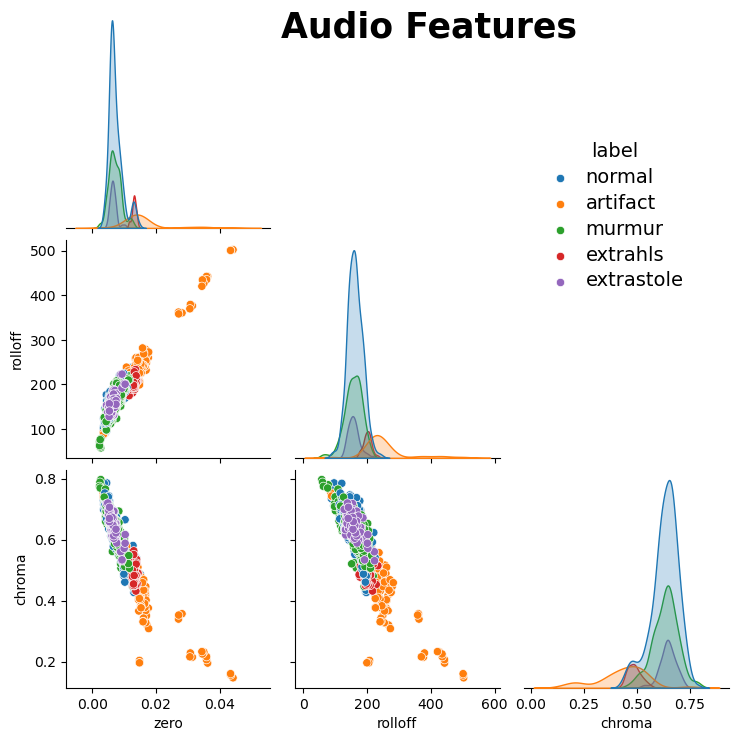

In [124]:
plot_pair(audio_df_cp, num_var, "label", "Audio Features")

In [125]:
audio_df.head()

mfcc0  mfcc1  mfcc2  mfcc3  mfcc4  mfcc5  mfcc6  mfcc7  mfcc8  mfcc9  ...  \
0 -500.72  92.62  86.07  77.63  67.26  55.69  43.78  32.54  22.60  14.28  ...   
1 -612.75  73.10  69.28  64.02  57.26  49.46  41.05  32.57  24.49  17.18  ...   
2 -614.68 103.95  93.90  80.44  64.62  48.38  33.46  21.18  12.00   5.81  ...   
3 -514.45  69.21  66.56  62.33  56.78  50.25  43.07  35.63  28.27  21.31  ...   
4 -503.89  46.59  45.53  43.86  41.69  39.05  36.00  32.60  28.98  25.23  ...   

   mfcc123  mfcc124  mfcc125  mfcc126  mfcc127  zero  rolloff  chroma  label  \
0     0.01     0.00     0.00    -0.01     0.00  0.01   180.94    0.56      3   
1    -0.17    -0.16    -0.13    -0.10    -0.05  0.01   161.15    0.62      4   
2     0.10     0.08     0.05     0.04     0.03  0.01   190.01    0.57      4   
3     0.01     0.00    -0.00    -0.00    -0.00  0.01   136.83    0.65      2   
4     0.24     0.19     0.15     0.10     0.05  0.00   117.49    0.69      3   

                                                file  
0        murmur__156_1306936373241_B.wav_stretch_0.8  
1  normal_noisynormal_157_1306937583792_B.wav_str...  
2  normal_noisynormal_188_1308074301731_A.wav_str...  
3    extrastole__213_1308245263936_D.wav_stretch_1.2  
4               murmur__201108222251.wav_stretch_0.8  

[5 rows x 133 columns]

In [126]:
audio_df.drop("file", axis=1, inplace= True)

In [127]:
X = audio_df.drop("label", axis=1)
y= audio_df.label

In [128]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [129]:
X_train, X_test, y_train,y_test = train_test_split(scaledX,y,random_state=42, train_size=0.8, shuffle=True)

In [130]:
X_train.shape , y_train.shape

((969, 131), (969,))

In [131]:
X_test.shape , y_test.shape

((243, 131), (243,))

Model Training and  Evalution

In [133]:
scores = cross_val_score(HistGradientBoostingClassifier(), X , y, cv=5)

In [134]:
scores

array([0.82716049, 0.81481481, 0.81818182, 0.83884298, 0.81404959])

In [135]:
scores.mean()

0.822609937761453

In [136]:
model = HistGradientBoostingClassifier().fit(X_train,y_train)

In [137]:
y_pred = model.predict(X_test)

<h3>Accuracy score 

In [139]:
report_dict = classification_report(y_test, y_pred, output_dict= True)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      0.60      0.75        10
           2       0.60      0.18      0.27        17
           3       0.90      0.57      0.70        61
           4       0.73      0.97      0.83       121

    accuracy                           0.80       243
   macro avg       0.85      0.66      0.71       243
weighted avg       0.81      0.80      0.78       243



In [140]:
audio_df.label.value_counts()

label
4    648
3    306
0    120
2     93
1     45
Name: count, dtype: int64

In [141]:
ycp = y_test

In [142]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(ycp)

In [143]:
y_test

801    4
677    4
43     1
990    3
70     4
      ..
904    4
673    4
708    2
367    4
464    3
Name: label, Length: 243, dtype: int32

In [144]:
y_pred = y_pred.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})
y_test = y_test.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})

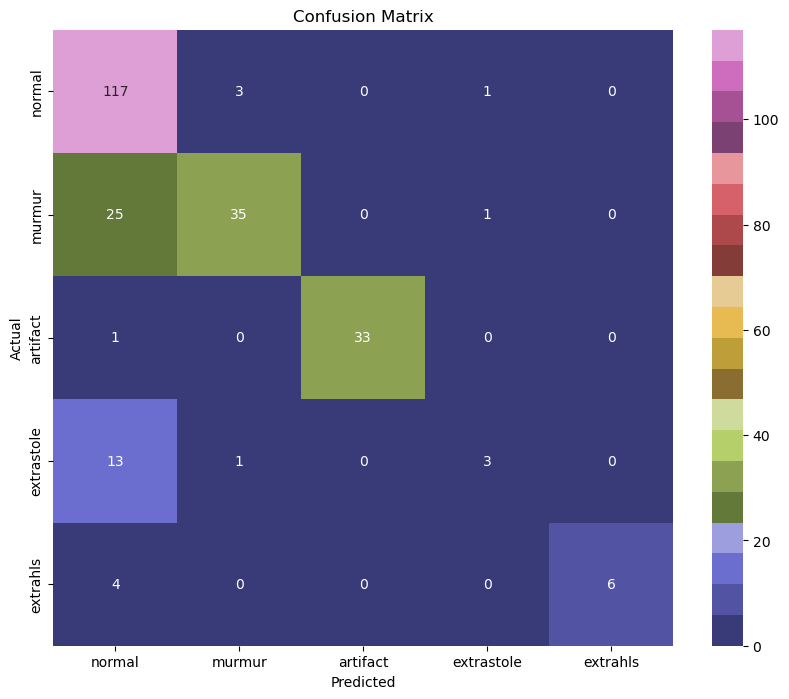

In [145]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["normal", "murmur", "artifact", "extrastole", "extrahls"]

conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= "tab20b", cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

    
  - Accuracy of 83.423 % and upto 86.68% on second cross validation score out of 5 folds was acheived using a basic HistBoostClassifier 

In [148]:
import os
import fnmatch
import librosa
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
# Define the Butterworth lowpass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs                                 
    normal_cutoff = cutoff / nyquist 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

In [150]:

# Apply the Butterworth lowpass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [151]:
# Extract audio features and create a DataFrame
def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)
            label = name.split("*")[0]

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(path=audio_path)  # Updated keyword argument

                if duration > min_duration:
                    x, sr = librosa.load(audio_path, duration=min_duration)
                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))
                    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=x_filtered, sr=sr))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))
                    
                    feature_list.append([*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

                    # Stretching for data augmentation
                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)
                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))
                    spectral_centroid_stretch_1 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_1, sr=sr))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_centroid_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])

                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)
                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_centroid_stretch_2 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_2, sr=sr))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_centroid_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)

In [152]:
# Define file paths and columns
audio_folders = ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/", "C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)] + ["zero", "spectral_centroid", "spectral_rolloff", "chroma", "label", "file"]

In [153]:
type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav", "extrahls*.wav"]

In [154]:
# Create DataFrame
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)

In [155]:

# Shuffle and reset index
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)


In [156]:
# Label encoding
encoder = LabelEncoder()
audio_df["label"] = encoder.fit_transform(audio_df["label"])

In [157]:

# Drop 'file' column
audio_df.drop("file", axis=1, inplace=True)

In [158]:

# Prepare data for model
X = audio_df.drop("label", axis=1)
y = audio_df.label
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [159]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, random_state=42, train_size=0.8, shuffle=True)

In [160]:
# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [161]:
# Cross-validation
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

Cross-validation scores: [0.81893004 0.80658436 0.80991736 0.81818182 0.80165289]
Mean cross-validation score: 0.8110532938815768


In [162]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.70      0.82        10
           2       1.00      0.06      0.11        17
           3       0.94      0.56      0.70        61
           4       0.73      0.99      0.84       121

    accuracy                           0.81       243
   macro avg       0.93      0.66      0.69       243
weighted avg       0.85      0.81      0.78       243



In [163]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

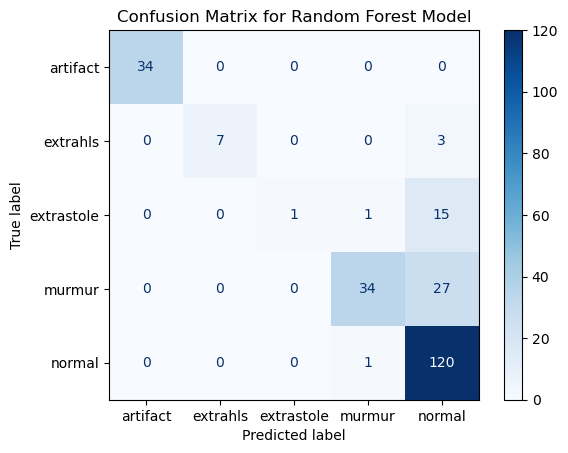

In [164]:
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

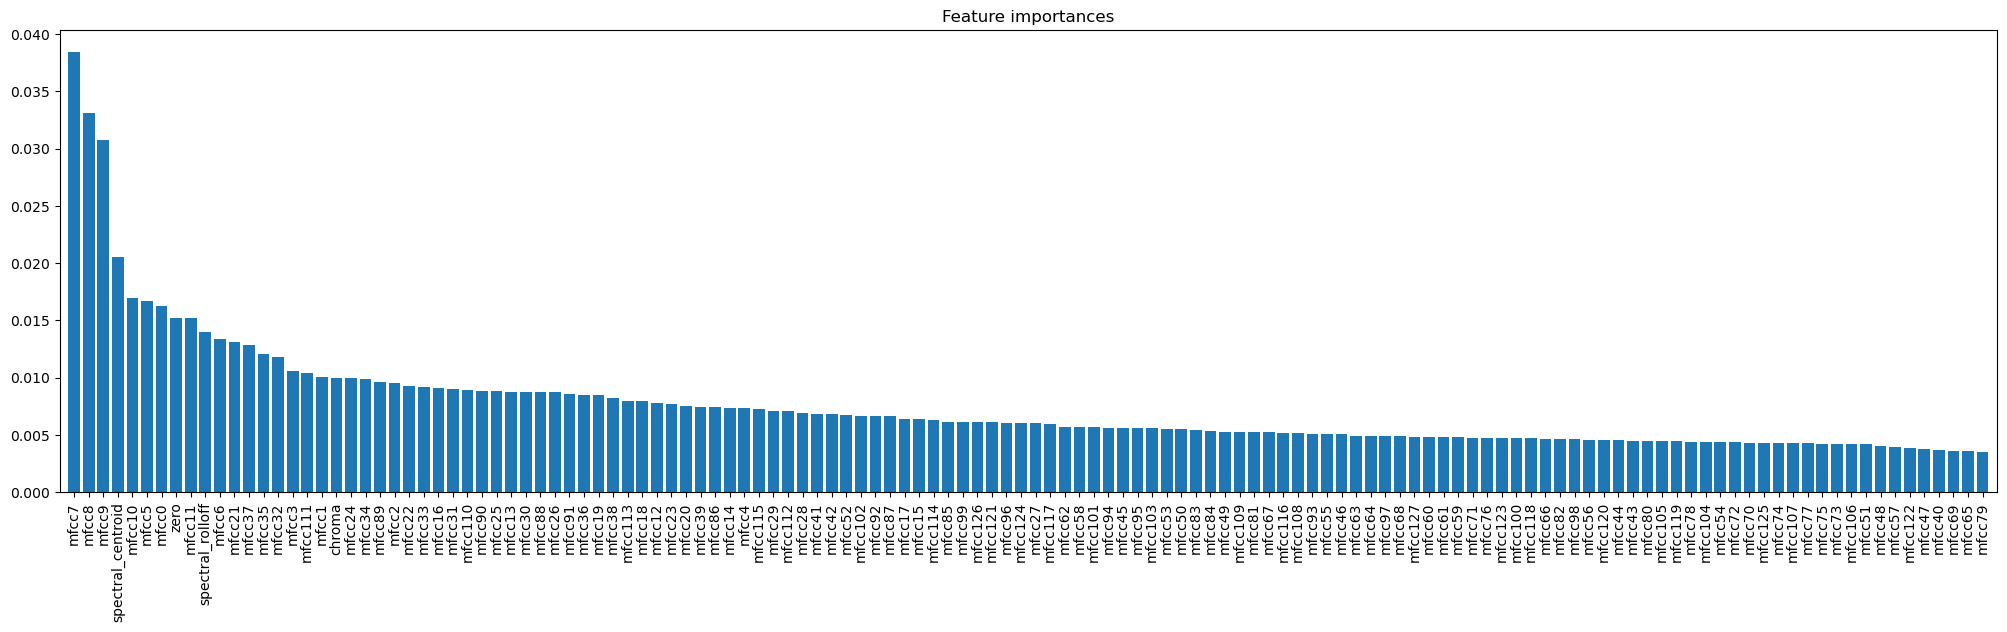

In [165]:
# Feature importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(25, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [166]:
import os
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, lfilter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier


In [167]:

# Define the low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


In [168]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [169]:
# Define the function to extract features
def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []
    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)
            label = name.split("*")[0]

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)

                if duration > min_duration:
                    x, sr = librosa.load(audio_path, duration=min_duration)
                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append([*mfcc_features, zero_crossings, spectral_rolloff, chroma_stft, label, file])

                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)
                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])

                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)
                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))

                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)

In [170]:
# Define columns and audio folders
audio_folders = ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/", "C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)] + ["zero", "rolloff", "chroma", "label", "file"]
type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav" , "extrahls*.wav"]


In [171]:

# Extract features and create DataFrame
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)
audio_df.drop("file", axis=1, inplace=True)


In [172]:
# Encode labels
encoder = LabelEncoder()
coded_label = encoder.fit_transform(audio_df["label"])
audio_df["label"] = coded_label


In [173]:
# Split data into features and labels
X = audio_df.drop("label", axis=1)
y = audio_df.label

In [174]:

# Scale features
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)


In [175]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, random_state=42, train_size=0.8, shuffle=True)

In [176]:

# Train AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [177]:
# Evaluate the model using cross-validation
scores = cross_val_score(ada_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.61728395 0.6255144  0.40082645 0.61570248 0.64049587]
Average cross-validation score: 0.5799646294595788


In [178]:
# Predict on test set
y_pred = ada_model.predict(X_test)

In [179]:

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        61
           4       0.58      1.00      0.74       121

    accuracy                           0.63       243
   macro avg       0.30      0.39      0.34       243
weighted avg       0.42      0.63      0.50       243



In [180]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

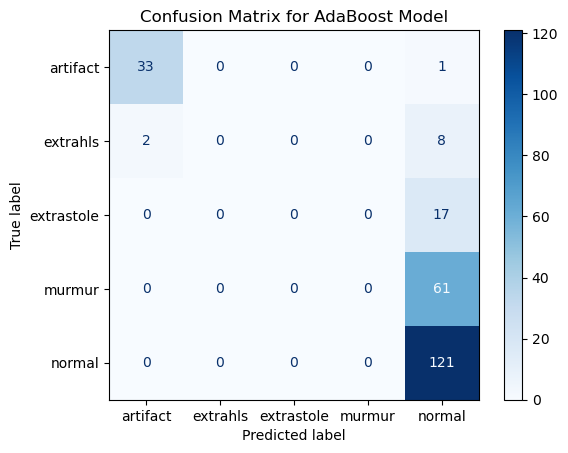

In [181]:
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()

In [182]:
import os
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, lfilter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier


In [183]:

# Define the low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a



In [184]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [185]:

# Define the function to extract features
def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)
            label = name.split("*")[0]

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)

                if (duration > min_duration):
                    x, sr = librosa.load(audio_path, duration=min_duration)
                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append([*mfcc_features, zero_crossings, spectral_rolloff, chroma_stft, label, file])

                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)
                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))
                    
                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])

                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)
                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)
                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))

                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)


In [186]:

# Define columns and audio folders
audio_folders = ["C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/", "C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)] + ["zero", "rolloff", "chroma", "label", "file"]
type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav" , "extrahls*.wav"]


In [187]:
# Extract features and create DataFrame
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)
audio_df.drop("file", axis=1, inplace=True)


In [188]:

# Encode labels
encoder = LabelEncoder()
coded_label = encoder.fit_transform(audio_df["label"])
audio_df["label"] = coded_label



In [189]:
# Split data into features and labels
X = audio_df.drop("label", axis=1)
y = audio_df.label


In [190]:

# Scale features
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)


In [191]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, random_state=42, train_size=0.8, shuffle=True)



In [192]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


GradientBoostingClassifier()

In [193]:

# Evaluate the model using cross-validation
scores = cross_val_score(gb_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())



Cross-validation scores: [0.81069959 0.76131687 0.7892562  0.79338843 0.78099174]
Average cross-validation score: 0.7871305649083427


In [194]:
# Predict on test set
y_pred = gb_model.predict(X_test)




In [195]:
# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      0.60      0.75        10
           2       0.50      0.12      0.19        17
           3       0.89      0.52      0.66        61
           4       0.71      0.96      0.81       121

    accuracy                           0.78       243
   macro avg       0.82      0.63      0.68       243
weighted avg       0.79      0.78      0.75       243



In [196]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)



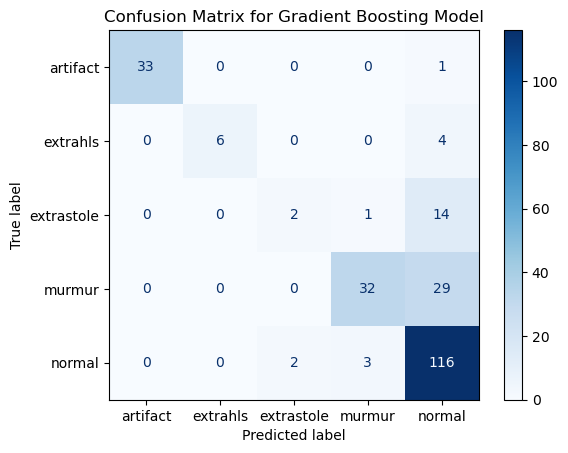

In [197]:
# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()